<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import random
random.seed(10)

population = []

for i in range(1000):
  population.append(random.randint(0,1))
print("This is the population: ",population)
print("This is the length of the population:",len(population))

#factorial as part of Combinations nCr
def factorial(num):
  if num == 1:
    return num
  else:
    return num * factorial(num-1)

  

# how many subsetsets may be made from a larger set( order doesnt matter)
def nCr(num,k):
  if k == 0:
    return 0
  if k == 1:
    return num
  else:
    return factorial(num)/(factorial(k)*factorial(num-k))

#conditional without replacement
def combinitorics(n,k):
  return sum(list(range(n-(k-1),n+1)))

#manual variance of population
def variance(list):
  n = len(list)
  return (np.sum((list - mean(list))**2) / (n-1))



#manual standard
def stddev(list):
  var = variance(list)
  return var**(1/2)

#manual T stat
# n = len(df.likes_coke)
# t_stat = (mean(df.['xxx']) - mean(population))/(stddev(df['xxx'])/n**(1/2))
# print(t_stat)

# #t = vairance between groups/ variance between within groups

# #at least 30 observations to reach a normal distribution

# #Ttest for one sample result Scip
# scipy.stats.ttest_1samp(df["This result"], mean(population))


In [0]:
# # normal distribution
# norm = stats.norm()
# print(norm.mean())
# print(norm.std())
# print(norm.var())

In [0]:
# t1 = stats.t(5) # 5 is df "shape" parameter / degrees of freedom / more there is free variation
# print(t1.mean())
# print(t1.std())
# print(t1.var())

In [0]:
from scipy import stats
import scipy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from matplotlib import style




In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

In [8]:
df.head(10)
df.tail(10)
df.shape

(434, 17)

In [9]:
df.columns =[
    "Class",
    'handy_inf',
    'water_project',
    'budget_res',
    'physician_fee',
    'el_salv',
    'religion_sch',
    'anti_sat_test',
    'nic_aid',
    'mx_missle',
    'immigration',
    'synfules',
    'education',
    'superfund',
    'crime',
    'duty-free',
    's_africa',
    
]



df.describe()


,Class,handy_inf,water_project,budget_res,physician_fee,el_salv,religion_sch,anti_sat_test,nic_aid,mx_missle,immigration,synfules,education,superfund,crime,duty-free,s_africa
count,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,235,194,253,247,211,271,239,242,207,215,264,233,208,247,232,268


In [10]:
df.head(20)


,Class,handy_inf,water_project,budget_res,physician_fee,el_salv,religion_sch,anti_sat_test,nic_aid,mx_missle,immigration,synfules,education,superfund,crime,duty-free,s_africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
5,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
6,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
8,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
9,republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n


In [0]:
df2 = df.iloc[0:434].replace('n', 0).replace('y', 1).replace("?",np.NaN)

In [12]:
df2.shape
df2.head()


,Class,handy_inf,water_project,budget_res,physician_fee,el_salv,religion_sch,anti_sat_test,nic_aid,mx_missle,immigration,synfules,education,superfund,crime,duty-free,s_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [0]:
cols  = list(df2.columns.values)

In [0]:
democrats = df2[df2['Class'] == 'democrat']

In [14]:
republican = df2[df2['Class'] == 'republican']
republican.shape

(167, 17)

In [42]:
for x in cols[1:]:
  print(x)
  print(scipy.stats.ttest_1samp(democrats[x], df2[x].mean(), nan_policy='omit'))


handy_inf
Ttest_1sampResult(statistic=5.296131922084601, pvalue=2.5415138284250796e-07)
water_project
Ttest_1sampResult(statistic=-0.015384907938303322, pvalue=0.9877379927473416)
budget_res
Ttest_1sampResult(statistic=14.843771035648821, pvalue=1.7416691479634146e-36)
physician_fee
Ttest_1sampResult(statistic=-25.71562214475246, pvalue=3.801532076557582e-73)
el_salv
Ttest_1sampResult(statistic=-11.15559718141797, pvalue=8.798258835840718e-24)
religion_sch
Ttest_1sampResult(statistic=-5.2612969999267785, pvalue=3.016829683853635e-07)
anti_sat_test
Ttest_1sampResult(statistic=7.7802254317186454, pvalue=1.7444362357705647e-13)
nic_aid
Ttest_1sampResult(statistic=10.802373009481162, pvalue=9.693409573673777e-23)
mx_missle
Ttest_1sampResult(statistic=9.381448166262864, pvalue=4.403870592897626e-18)
immigration
Ttest_1sampResult(statistic=-1.0385919826118395, pvalue=0.29995207010905356)
synfules
Ttest_1sampResult(statistic=4.576368483911745, pvalue=7.407053536355718e-06)
education
Ttest_1sa

In [41]:
for x in cols[1:]:
  print(x)
  print(scipy.stats.ttest_1samp(republican[x], df2[x].mean(), nan_policy='omit'))

handy_inf
Ttest_1sampResult(statistic=-8.285939398883993, pvalue=4.089204413434685e-14)
water_project
Ttest_1sampResult(statistic=0.01959158916074193, pvalue=0.9843959222632311)
budget_res
Ttest_1sampResult(statistic=-17.251861548754086, pvalue=1.6044942526787944e-38)
physician_fee
Ttest_1sampResult(statistic=66.50519021131922, pvalue=4.8957260595551306e-120)
el_salv
Ttest_1sampResult(statistic=26.53131755195207, pvalue=4.8772584588954085e-61)
religion_sch
Ttest_1sampResult(statistic=10.797228747469338, pvalue=7.202647400828811e-21)
anti_sat_test
Ttest_1sampResult(statistic=-9.648751111916477, pvalue=1.1976484787887119e-17)
nic_aid
Ttest_1sampResult(statistic=-14.620973507517919, pvalue=5.615402011020805e-31)
mx_missle
Ttest_1sampResult(statistic=-15.420872881754219, pvalue=1.1511681553954428e-33)
immigration
Ttest_1sampResult(statistic=1.3195451013817467, pvalue=0.18883734887705717)
synfules
Ttest_1sampResult(statistic=-8.54798218538346, pvalue=1.0109049370471268e-14)
education
Ttest_

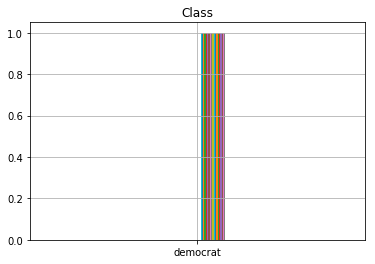

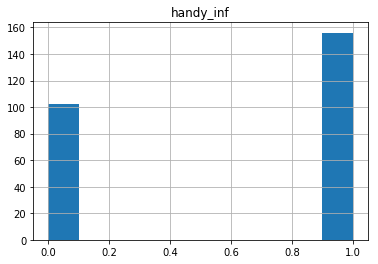

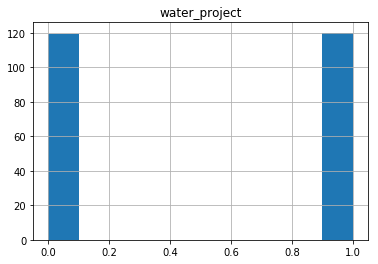

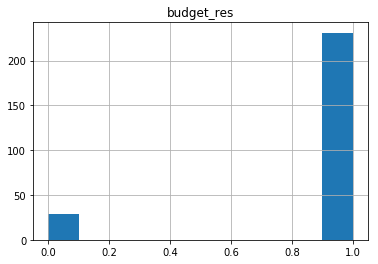

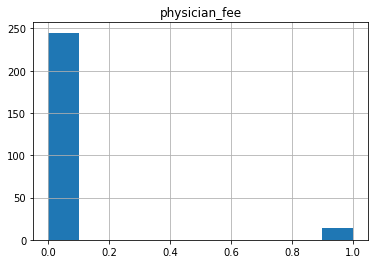

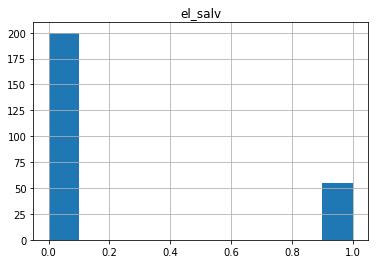

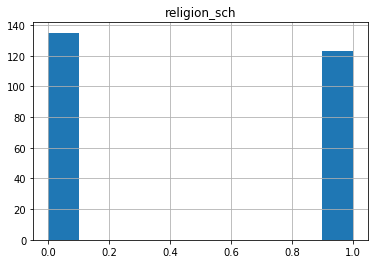

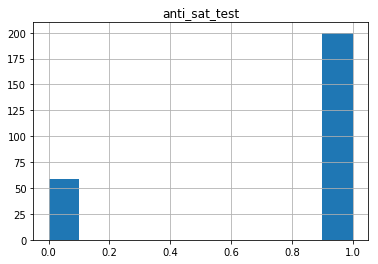

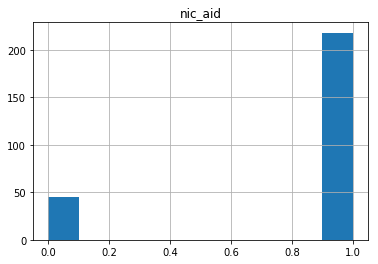

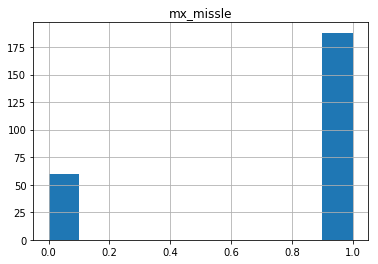

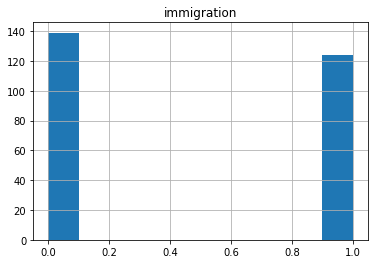

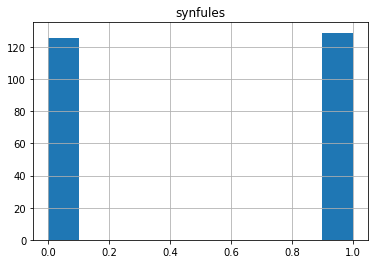

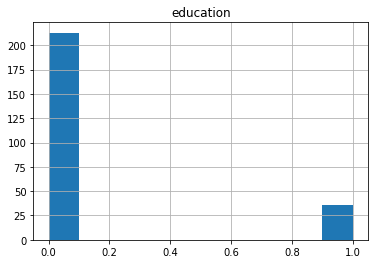

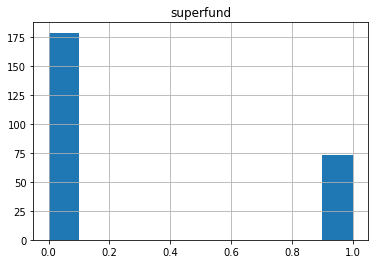

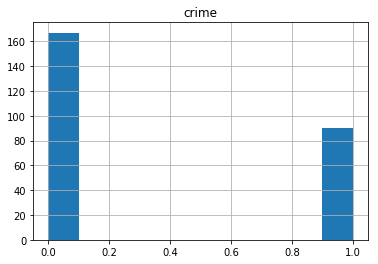

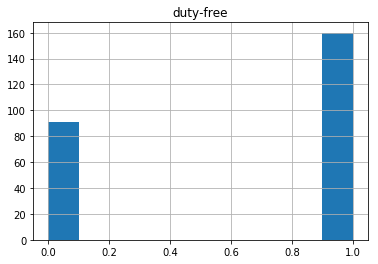

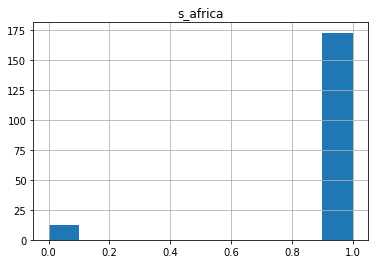

In [34]:
for x in cols:
  democrats[x].hist()
  plt.title(x)
  plt.show();

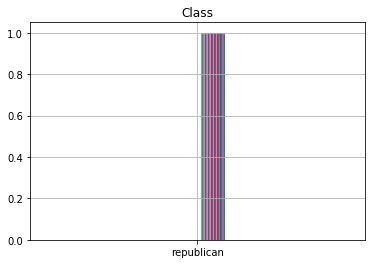

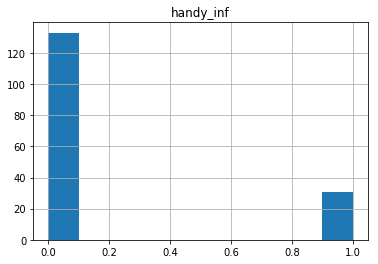

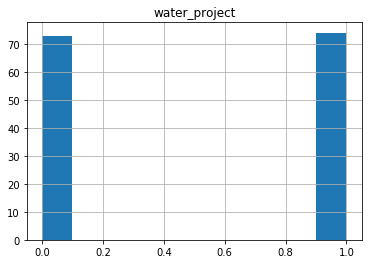

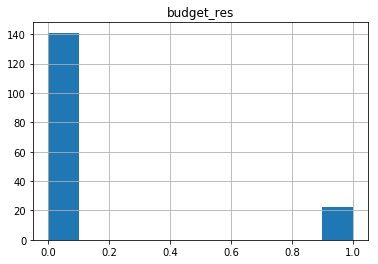

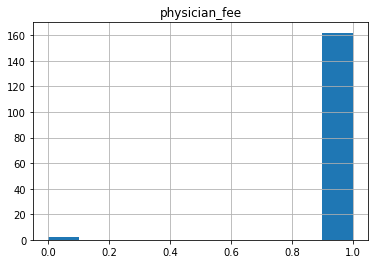

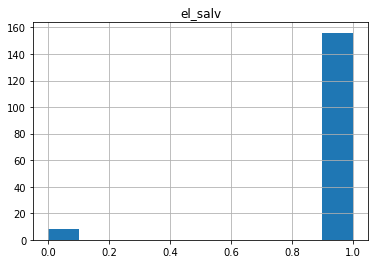

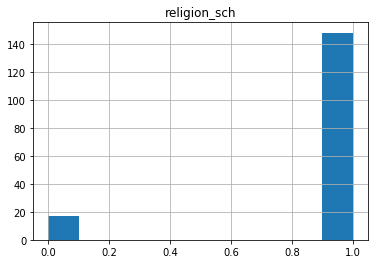

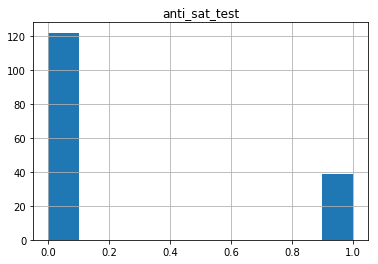

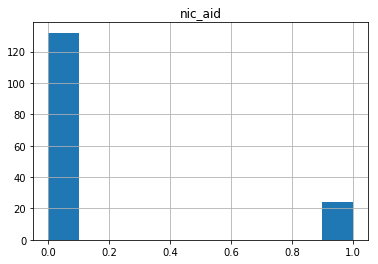

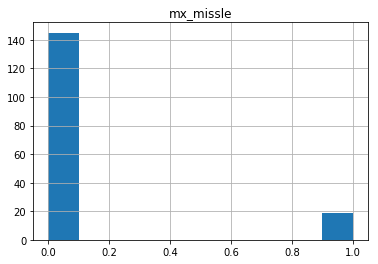

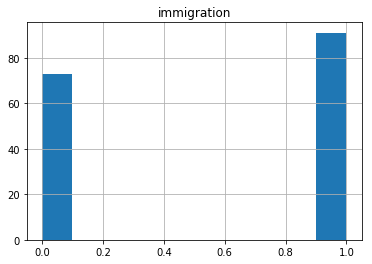

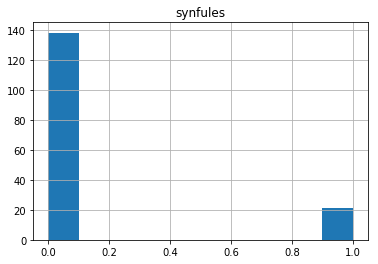

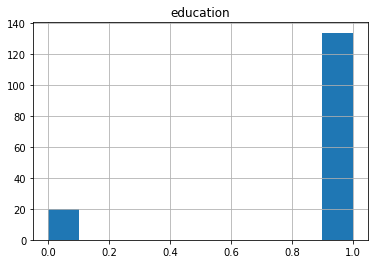

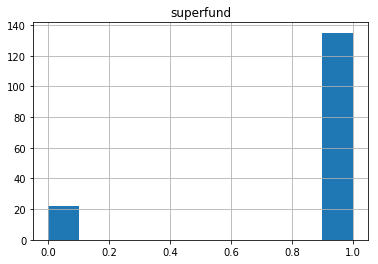

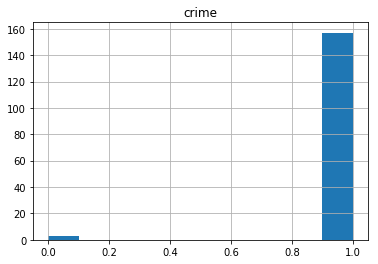

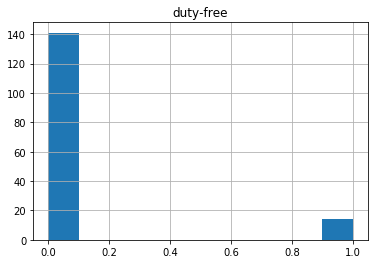

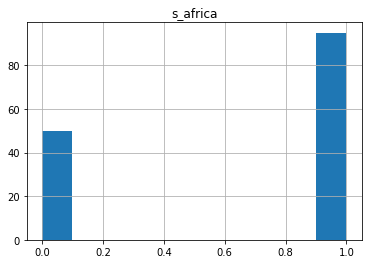

In [35]:
for x in cols:
  republican[x].hist()
  plt.title(x)
  plt.show();

In [28]:
for sample in [democrats, republican]:
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    print("---"*10)

Mean: handy_inf        0.604651
water_project    0.502092
budget_res       0.888462
physician_fee    0.054054
el_salv          0.215686
religion_sch     0.476744
anti_sat_test    0.772201
nic_aid          0.828897
mx_missle        0.758065
immigration      0.471483
synfules         0.505882
education        0.144578
superfund        0.289683
crime            0.350195
duty-free        0.637450
s_africa         0.935135
dtype: float64
Standard Deviation: handy_inf        0.489876
water_project    0.501045
budget_res       0.315405
physician_fee    0.226562
el_salv          0.412106
religion_sch     0.500430
anti_sat_test    0.420224
nic_aid          0.377317
mx_missle        0.429121
immigration      0.500138
synfules         0.500949
education        0.352383
superfund        0.454518
crime            0.477962
duty-free        0.481697
s_africa         0.246956
dtype: float64
Variance: handy_inf        0.239978
water_project    0.251046
budget_res       0.099480
physician_fee    0.05133

2 test 

In [40]:
for x in cols[1:]:
  print(x)
  print(scipy.stats.ttest_ind(democrats[x], republican[x], nan_policy='omit'))

handy_inf
Ttest_indResult(statistic=9.15392122841775, pvalue=2.4195550274149624e-18)
water_project
Ttest_indResult(statistic=-0.02491808700047811, pvalue=0.9801332440121653)
budget_res
Ttest_indResult(statistic=23.12119107755175, pvalue=6.013425749068062e-77)
physician_fee
Ttest_indResult(statistic=-49.213324889131904, pvalue=1.0401154557088818e-176)
el_salv
Ttest_indResult(statistic=-21.06444879561732, pvalue=1.3035583587179729e-67)
religion_sch
Ttest_indResult(statistic=-9.694471882817886, pvalue=3.415425248481181e-20)
anti_sat_test
Ttest_indResult(statistic=12.457095175493478, pvalue=1.6414204749130307e-30)
nic_aid
Ttest_indResult(statistic=17.9719921713269, pvalue=6.835532456916702e-54)
mx_missle
Ttest_indResult(statistic=16.371375965888596, pvalue=1.0255175625864558e-46)
immigration
Ttest_indResult(statistic=-1.677960615722372, pvalue=0.0940899398968142)
synfules
Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)
education
Ttest_indResult(statistic=-20.414